# Genesis Paul, ECON 411 Project
Rough Draft

## Project Summary:
The purpose of minimum wage is to preserve livability for the lowest paid working class. That being said, the Federal Minimum Wage is currently $7.25 per hour, and has been since July 2009. However, there is much debate on whether this wage should be increased to a true "livable wage." Therefore, I will be doing an analysis in order to determine if the current minimum wage is satisfactory, and if not, I will attempt to determine what would be a satisfactory amount.

*Key Variables:*

<u>Time Frame</u>: 1990 - 2020, there is enough variation in Federal Minimum Wage during this time frame that it appears to be an appropriate representation of the data

<u>Federal Minimum Wage</u>: Clearly, in order to do an analysis on the increase of the Federal Minimum Wage, I will need this data for the identified time frame. 

<u>State Minimum Wage</u>: State Minimum Wage varies drastically by population, job avaliability, and various other factors per state. Since Federal Minimum Wage must be representative of all states, using the State Minimum Wage data is essential to my analysis.

<u>Effective Minimum Wage (State)</u>: Effective Minimum Wage includes all compensation that an employee receives (base pay, bonus, benefits, etc.). This also varies drastically by state. Although I do not forsee using this information drastically within my analysis, I do think it is important to incorporate benefits when determining "livability."

<u>Consumer Product Index (CPI)</u>: CPI tracks the change in the cost of living over time. Incorporating the cost of living into an analysis regarding a livable wage is crucial in determining whether or not the minimum wage is satisfactory

<u>Average Mean Household Income</u>: I will be using average mean household income by state, with the assumption that the average is "livable." 

<u>Unemployment Level</u>: In recent years, unemployment has skyrocketed. Thus, I decided that incorporating it into my analysis could potentially sway the results. 


### Data
I will be using data representative of the above listed key variables.

In [1]:
import pandas as pd
import numpy as np

In [2]:
minWage = pd.read_csv("Minimum Wage Data.csv") # Federal, State, Effective, CPI
household = pd.read_csv("Household Income.csv") # Average Median Income by State
unemploy = pd.read_csv("Unemployment.csv") # US Unemployment Level

In [3]:
# Minimum Wage Clean Up
minWage = minWage.set_index(['Year', 'State'])
minWage = minWage[['State.Minimum.Wage', 
               'Federal.Minimum.Wage', 
               'Effective.Minimum.Wage', 
               'CPI.Average']]
minWage = minWage.rename(columns = {"State.Minimum.Wage": "State Minimum Wage", 
               "Federal.Minimum.Wage": "Federal Minimum Wage", 
               "Effective.Minimum.Wage": "Effective Minimum Wage", 
               "CPI.Average": "CPI Average"})
minWage = minWage.loc[1990:2020]
minWage

State Minimum Wage  Federal Minimum Wage  \
Year State                                                     
1990 Alabama                      0.00                  3.35   
     Alaska                       3.85                  3.35   
     Arizona                      0.00                  3.35   
     Arkansas                     3.25                  3.35   
     California                   3.35                  3.35   
...                                ...                   ...   
2020 Virginia                     7.25                  7.25   
     Washington                  13.50                  7.25   
     West Virginia                8.75                  7.25   
     Wisconsin                    7.25                  7.25   
     Wyoming                      5.15                  7.25   

                    Effective Minimum Wage  CPI Average  
Year State                                               
1990 Alabama                          3.35       130.70  
     Alaska                           3.85       130.70  
     Arizona                          3.35       130.70  
     Arkansas                         3.35       130.70  
     California                       3.35       130.70  
...                                    ...          ...  
2020 Virginia                         7.25       258.66  
     Washington                      13.50       258.66  
     West Virginia                    8.75       258.66  
     Wisconsin                        7.25       258.66  
     Wyoming                          7.25       258.66  

[1581 rows x 4 columns]

In [4]:
minWage.describe()

,State Minimum Wage,Federal Minimum Wage,Effective Minimum Wage,CPI Average
count,1581.000000,1581.000000,1581.000000,1581.000000
mean,5.227438,5.703226,6.123966,195.655871
std,2.708434,1.279829,1.755032,38.868911
min,0.000000,3.350000,3.350000,130.700000
25%,4.250000,4.750000,5.000000,160.500000
50%,5.150000,5.150000,5.250000,195.300000
75%,7.250000,7.250000,7.250000,232.957000
max,13.500000,7.250000,13.500000,258.660000


In [5]:
# Household Income Clean Up
income = pd.read_csv("Household Income.csv")
income = income.rename(columns = {"DATE": "Year"})
income = income.set_index(['Year'])
income

,Median Household Income
Year,
1990,57677
1991,55992
1992,55559
1993,55263
1994,55905
1995,57655
1996,58494
1997,59697
1998,61891


In [6]:
income.describe()

,Median Household Income
count,31.000000
mean,60701.903226
std,3402.893419
min,55263.000000
25%,58113.000000
50%,60901.000000
75%,62449.000000
max,69560.000000


In [7]:
# Unemployment Level Clean Up
unemploy = pd.read_csv("Unemployment.csv")
unemploy = unemploy.set_index('Year')
unemploy

,Unemployment Level
Year,
1990,7061.000000
1991,8639.833333
1992,9611.166667
1993,8926.666667
1994,7975.500000
1995,7406.916667
1996,7231.083333
1997,6728.666667
1998,6203.833333


In [8]:
unemploy.describe()

,Unemployment Level
count,31.000000
mean,8669.196237
std,2567.381335
min,5685.083333
25%,6987.000000
50%,7975.500000
75%,9274.833333
max,14807.750000


### Analysis & Visualization of Data

In [9]:
import matplotlib.pyplot as plt
from datlib.plots import *

#### Histogram: MinWage

No handles with labels found to put in legend.


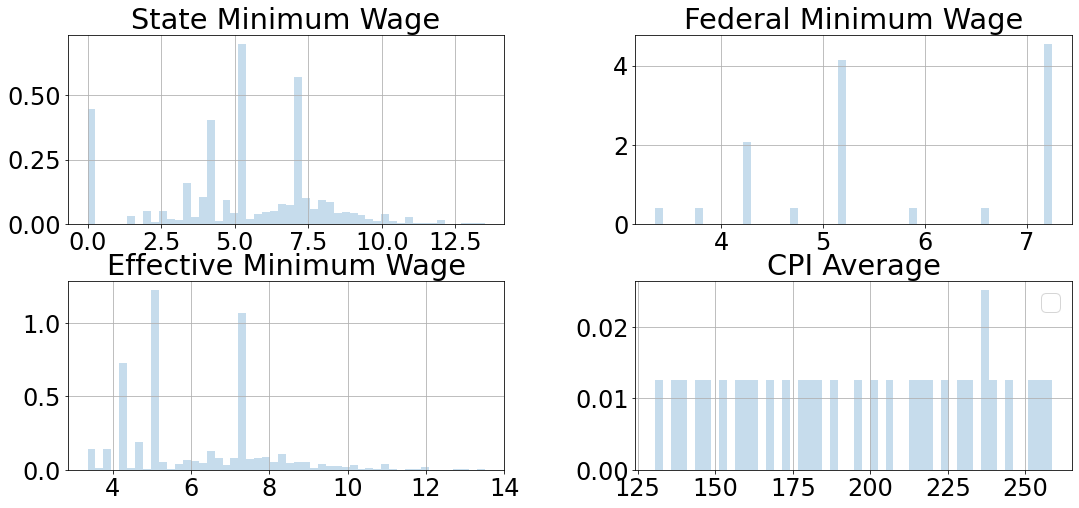

In [10]:
plt.rcParams.update({"font.size": 24})
fig, ax = plt.subplots(2, 2, figsize = (18, 8))
minWage.hist(bins = 50,
            alpha = 0.25,
            ax = ax,
            density = True)
plt.legend()
plt.show()

<u>Above Histograms</u>: 

*The above charts show the frequency associated with each respective variable. None of which appear to be distributed normally.* 

**Federal Minimum Wage:** It can be observed that small, short term upward adjustments are made to the Federal Minimum Wage throughout the year, but eventually a longer term wage is established. The 3 instances of "longer term wages" (higher frequency) are approximately 4.25, 5.15, and 7.25. As the federal minimum wage increased, we see that the frequency also increases. Therefore, we can assume that there may be small, short term upward adjustments to the current Federal Minimum Wage, however, once a "long term wage" is established, it will likely be in effect for longer than the current minimum wage has been in effect. 

**State Minimum Wage & Effective Minimum Wage:** Although different, the State Minimum Wage & Effective Minimum Wage appear to be distributed similarly. That being said, we can assume that there is a strong correlation between State & Effective Minimum Wage

**CPI Average:** The Average CPI histogram is almost perfectly flat, thus each CPI average value has the same frequency. That means that the CPI Average is highly variable (changes often). And, if the CPI is changing this often, one may assume that Minimum Wage (Federal, State, and Effective) would also be more variable. Thus, I will study this further.

##### Correlation Matrix: MinWage

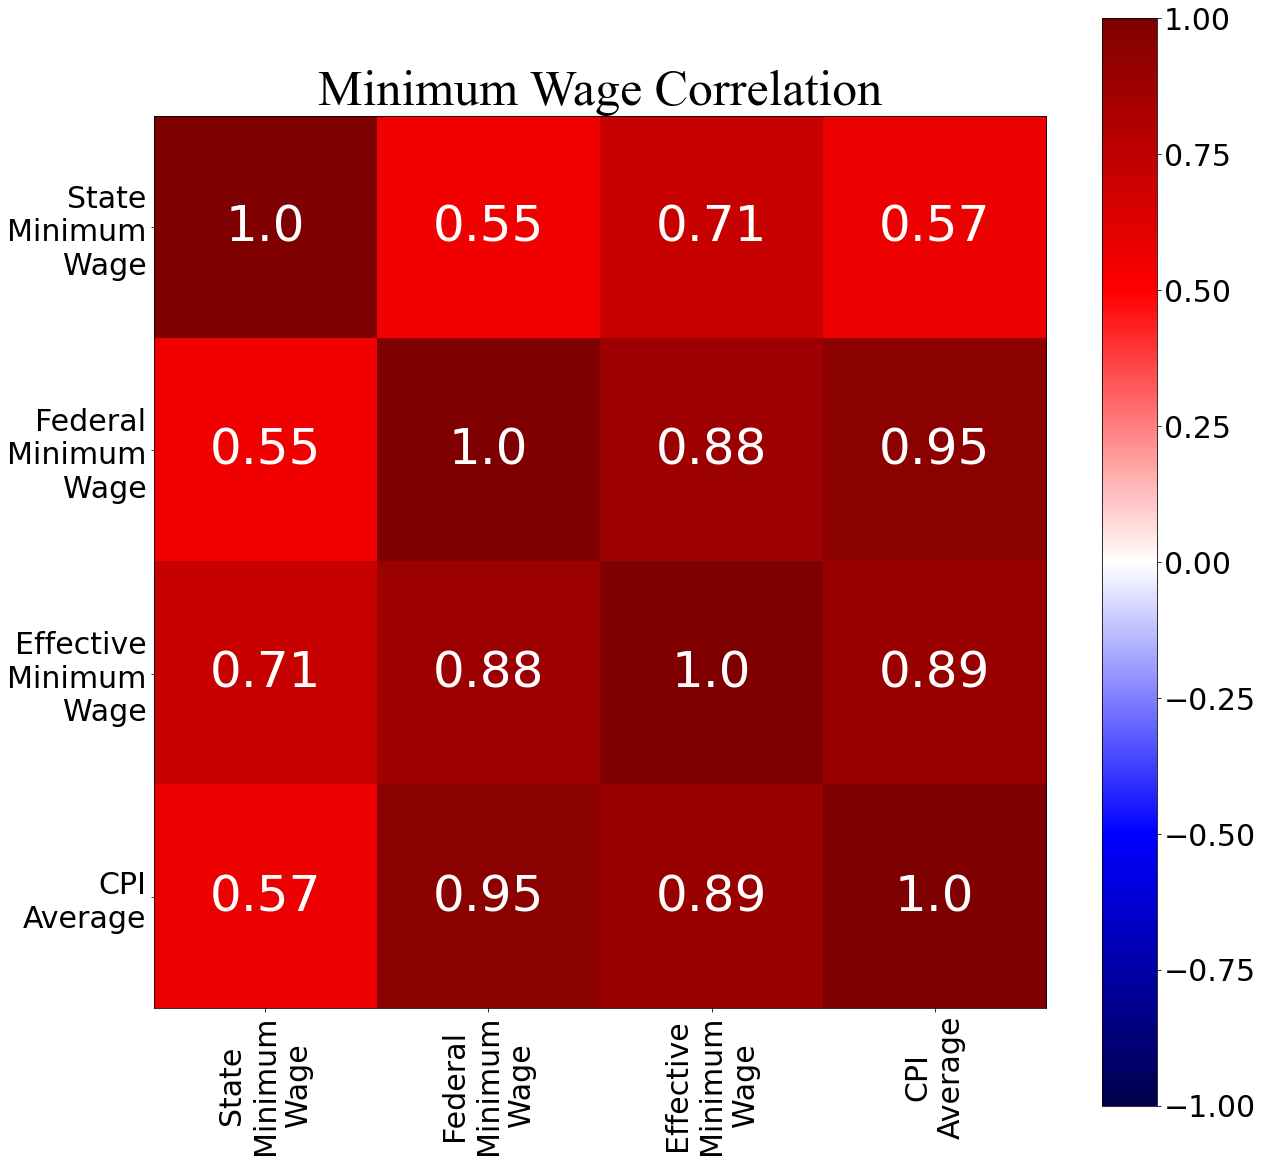

In [11]:
minWage_corr = corr_matrix_heatmap(minWage.corr(),
                                   save_fig = False,
                                   pp = None,
                                   title = "Minimum Wage Correlation")

It can easily be seen that through the abundance of red within the correlation matrix above that all of these variables (Federal Minimum, State Minimum Wage, Effective Minimum Wage, and CPI) are highly correlated. However, I would like to further compare Federal & State Minimum Wage as they are the least correlated variables to one another.

##### Federal & State Comparison Using 2020 Data
The above analysis leads me to the conclusion that there are discrepencies in whether or not the Federal Minimum Wage is an adequate value. Therefore, I would like to specifically look at the 2020 data in order to further understand how State & Effective Minimum Wage compare to Federal.

In [12]:
minWage2 = pd.read_csv("Minimum Wage Data.csv")
minWage2 = minWage2.set_index(['Year', 'State'])
minWage2 = minWage2[['State.Minimum.Wage', 
               'Federal.Minimum.Wage', 
               'Effective.Minimum.Wage']]
minWage2 = minWage2.rename(columns = {"State.Minimum.Wage": "State Minimum Wage", 
               "Federal.Minimum.Wage": "Federal Minimum Wage", 
               "Effective.Minimum.Wage": "Effective Minimum Wage"})
minWage2 = minWage2.loc[2020]
minWage2

,State Minimum Wage,Federal Minimum Wage,Effective Minimum Wage
State,,,
Alabama,0.00,7.25,7.25
Alaska,10.19,7.25,10.19
Arizona,12.00,7.25,12.00
Arkansas,10.00,7.25,10.00
California,13.00,7.25,13.00
Colorado,12.00,7.25,12.00
Connecticut,11.00,7.25,11.00
Delaware,9.25,7.25,9.25
Florida,8.56,7.25,8.56


<AxesSubplot:xlabel='State'>

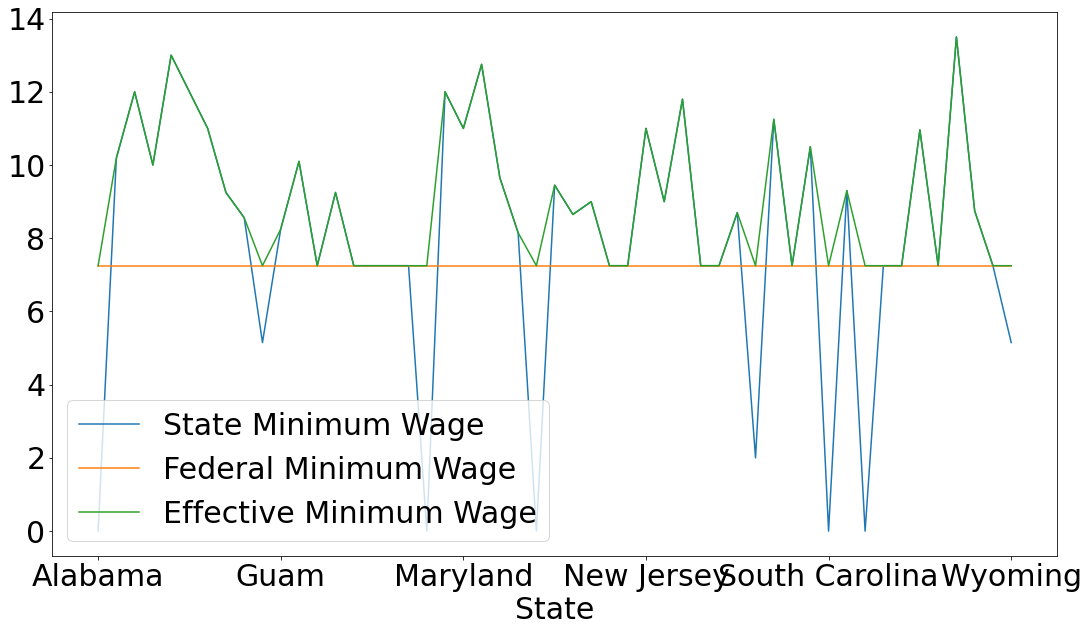

In [13]:
fig, ax = plt.subplots(figsize = (18, 10))
minWage2.plot.line(ax = ax,
                  legend = True)

<u>Above Chart</u>:
    
The **Federal Minimum Wage** line acts as a base line in the above chart. 

**State & Effective Minimum Wage Further Described Below**

In [14]:
minWage['State Minimum Wage'].loc[2020].unique()

array([ 0.  , 10.19, 12.  , 10.  , 13.  , 11.  ,  9.25,  8.56,  5.15,
        8.25, 10.1 ,  7.25, 12.75,  9.65,  8.15,  9.45,  8.65,  9.  ,
       11.8 ,  8.7 ,  2.  , 11.25, 10.5 ,  9.3 , 10.96, 13.5 ,  8.75])

*State Minimum Wage flucates from $0 - 13.50* 

Some states have a minimum wage of 0. This simply means that the state has not adopted an official minimum wage and the Federal Minimum Wage applies. 

It appears that some states have a minimum wage that is non-zero and less than 7.25. 

In these cases, Federal Minimum Wage applies. There is a large majority of states that have a minimum wage that exceeds federal.

In [15]:
minWage['Effective Minimum Wage'].loc[2020].unique()

array([ 7.25, 10.19, 12.  , 10.  , 13.  , 11.  ,  9.25,  8.56,  8.25,
       10.1 , 12.75,  9.65,  8.15,  9.45,  8.65,  9.  , 11.8 ,  8.7 ,
       11.25, 10.5 ,  9.3 , 10.96, 13.5 ,  8.75])

*Effective Minimum Wage flucates from $7.25 - 13.50* 

No states have an Effective Minimum Wage that is less than federal, but many have an Effective Minimum Wage that exceeds federal. Therefore, if I were to complete no other analysis, I would draw the conclusion that Federal Minimum Wage is not adequate. Because: Federal Minimum Wage is only accounting for the states that have the lowest Effective Minimum Wage, this does not feel like an effective way to choose a Federal Minimum Wage. 

A more effective method may be to average the Effective Minimum Wages, or compensate for the state with the highest Effective Minimum Wage (because then you know all states are represented). 

*The above methods are not based on any further research, but rather are suggestions that initially came to my mind, simply by observing the unique Effective Minimum Wage values.

##### Establish what would be an adequate Federal Minimum Wage incorporating Median Household Income & Unemployment Level
The median household income and unemployment level values are US averages for each year from 1990 - 2020. Therefore, in this portion of my analysis, I will be averaging every states data for each year from 1990 - 2020. Using averages feels appropriate because an average tends to be a good representation of an entire population despite outlier states.

In [16]:
minWage3 = pd.read_csv("Minimum Wage Data.csv")
minWage3 = minWage3.set_index(['Year'])
minWage3 = minWage3[['State.Minimum.Wage', 
               'Federal.Minimum.Wage', 
               'Effective.Minimum.Wage']]
minWage3 = minWage3.rename(columns = {"State.Minimum.Wage": "State Minimum Wage", 
               "Federal.Minimum.Wage": "Federal Minimum Wage", 
               "Effective.Minimum.Wage": "Effective Minimum Wage"})
minWage3 = minWage3.loc[1990:2020]
minWage3 = minWage3.groupby(level=0).mean()
minWage3

,State Minimum Wage,Federal Minimum Wage,Effective Minimum Wage
Year,,,
1990,2.596078,3.35,3.406863
1991,3.169608,3.80,3.885294
1992,3.442549,4.25,4.281765
1993,3.442549,4.25,4.281765
1994,3.553333,4.25,4.317059
1995,3.553333,4.25,4.317059
1996,3.593529,4.25,4.357255
1997,3.846471,4.75,4.820980
1998,4.164314,5.15,5.182941


<AxesSubplot:xlabel='Year'>

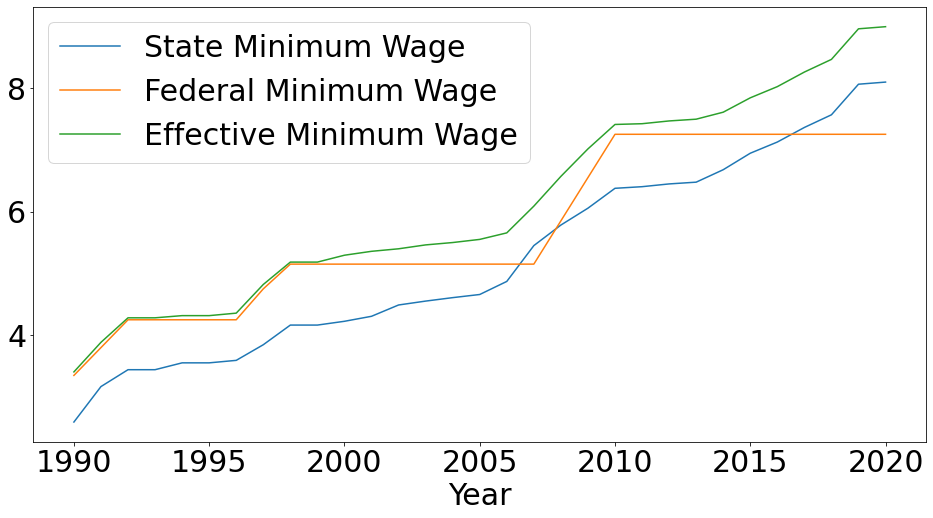

In [17]:
fig, ax = plt.subplots(figsize = (16,8))
minWage3.plot.line(ax = ax, 
                  legend = True)

<u>Above Graph</u>: 

*The above charts show the frequency associated with each respective variable. None of which appear to be distributed normally.* 

**Federal Minimum Wage:** The line for Federal Minimum Wage is exactly what is to be expected after viewing the histogram

**State Minimum Wage:** I did not expect the average State Minimum Wage to consistently be lower than the Federal Minimum Wage. However, in 2008 (one of the only times) when the average appears to have exceeded federal, Federal Minimum Wage increased. However, the current average is and has exceeded federal since approximately 2017. Indicating that an increase should be occuring soon.

**Effective Minimum Wage:** I also did not expect the average Effective Minimum Wage to align so nicely with Federal Minimum Wage from 1990 - 1999. However, in most recent years, although the overall pattern of effective appears to resemble federal, it is by a larger, and growing, margin. Once again, indicating that an increase should be occuring soon.

##### Annualize
Now I will be annualizing the Minimum Wages (Federal, State, & Effective) by assuming a working person works 40 hours a week, 52 weeks a year, and that there are 2 adult incomes per household. And comparing them to the Average Median Household Income. 

*Note: I am assuming the Average Median Household Income is a "livable wage"*

In [18]:
minWage3

,State Minimum Wage,Federal Minimum Wage,Effective Minimum Wage
Year,,,
1990,2.596078,3.35,3.406863
1991,3.169608,3.80,3.885294
1992,3.442549,4.25,4.281765
1993,3.442549,4.25,4.281765
1994,3.553333,4.25,4.317059
1995,3.553333,4.25,4.317059
1996,3.593529,4.25,4.357255
1997,3.846471,4.75,4.820980
1998,4.164314,5.15,5.182941


In [19]:
minWage3['Federal Minimum Wage'] = minWage3['Federal Minimum Wage'] * 40 * 52 * 2
minWage3['State Minimum Wage'] = minWage3['State Minimum Wage'] * 40 * 52 * 2
minWage3['Effective Minimum Wage'] = minWage3['Effective Minimum Wage'] * 40 * 52 *2
minWage3

,State Minimum Wage,Federal Minimum Wage,Effective Minimum Wage
Year,,,
1990,10799.686275,13936.0,14172.549020
1991,13185.568627,15808.0,16162.823529
1992,14321.003922,17680.0,17812.141176
1993,14321.003922,17680.0,17812.141176
1994,14781.866667,17680.0,17958.964706
1995,14781.866667,17680.0,17958.964706
1996,14949.082353,17680.0,18126.180392
1997,16001.317647,19760.0,20055.278431
1998,17323.545098,21424.0,21561.035294


In [20]:
annual = minWage3.merge(income, left_index = True, right_index = True)
annual

,State Minimum Wage,Federal Minimum Wage,Effective Minimum Wage,Median Household Income
Year,,,,
1990,10799.686275,13936.0,14172.549020,57677
1991,13185.568627,15808.0,16162.823529,55992
1992,14321.003922,17680.0,17812.141176,55559
1993,14321.003922,17680.0,17812.141176,55263
1994,14781.866667,17680.0,17958.964706,55905
1995,14781.866667,17680.0,17958.964706,57655
1996,14949.082353,17680.0,18126.180392,58494
1997,16001.317647,19760.0,20055.278431,59697
1998,17323.545098,21424.0,21561.035294,61891


<AxesSubplot:xlabel='Year'>

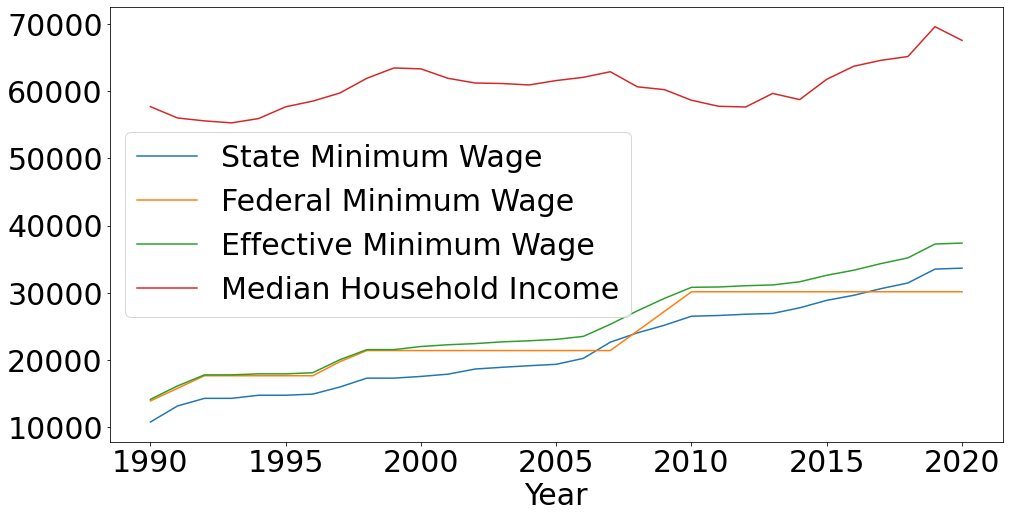

In [21]:
fig, ax = plt.subplots(figsize = (16,8))
annual.plot.line(ax = ax, 
                  legend = True)

<u>Above Graph</u>

There is an astronomical difference between Federal/State/Effective Minimum Wages and the Median Household Income.

In [22]:
income2 = income['Median Household Income'] / 40 / 52 / 2
income2

Year
1990    13.864663
1991    13.459615
1992    13.355529
1993    13.284375
1994    13.438702
1995    13.859375
1996    14.061058
1997    14.350240
1998    14.877644
1999    15.245913
2000    15.214423
2001    14.877163
2002    14.709135
2003    14.690625
2004    14.639663
2005    14.796394
2006    14.911779
2007    15.111779
2008    14.573077
2009    14.471154
2010    14.093029
2011    13.877885
2012    13.851683
2013    14.336538
2014    14.116587
2015    14.843269
2016    15.308413
2017    15.518510
2018    15.655529
2019    16.721154
2020    16.231010
Name: Median Household Income, dtype: float64

##### Finalizing Analysis

We see above that in order to make the Median Household income, given 2 adults work 40 hours a week, 52 weeks a year, minimum wage would have to be set as approximately $16.23.

However, jumping from $7.25 to 16.23 would likely have a large impact on inflation. Therefore, I support an increase that is consistent with historical data.

In [23]:
a = 16.23 / 7.25
a

2.2386206896551726

Increasing minimum wage to 16.23 would be requesting a 223.862% increase, which would require further research to determine if the economy would be able to support it. However, I am going to assume it can not and base my decision on the following:

In [24]:
##### Percent Changes Observed in Federal Minimum Wage in 1990 - 2020

In [25]:
annual.pct_change()
x = 0.134328 + 0.118421 ## 1991 - 1992 Federal
y = 0.117647 + 0.084211 ## 1997 - 1998 Federal
z = 0.135922 + 0.119658 + 0.106870 ## 2008 - 2010 Federal

print(x, y, z)

0.252749 0.20185799999999998 0.36245


Over the years, Federal Minimum Wage has seen increases that appear to have no apparent pattern, thus I will average them in order to determine an increase the economy can support.

In [26]:
i = (x + y + z) / 3
i

0.2723523333333333

The economy can support a 27.235% increase in Federal Minimum Wage. However, through my analysis it appears that an increase is overdue. Therefore, I wil be multiplying the above percentage by 1.5 in order to incorporate the fact that the Minimum Wage should have increased a few years ago. 

*Note: 1.5 was a value I chose at random that I felt would be appropriate*

In [27]:
iNew = i * 1.5
iNew

0.40852849999999996

We know the economy can support a 40.85% increase, because in the most recent year we saw an increase of 36.245%

In [28]:
suggestedMinWage = 7.25 * (1 + iNew)
suggestedMinWage

10.211831625

In [29]:
suggestedMinWage * 40 * 52 * 2

42481.219560000005

### Conclusion
**My Suggestion at this point in time is that Federal Minimum Wage be increased to $10.21**

<u> Things to Keep in Mind Regarding My Suggestion </u>

> Based on the data, this increase does not go outside the realm of reasonable.

> If Federal Minimum Wage were to increase, State Minimum Wages will also likely increase.


In [30]:
import io
import os
from nbformat import current

total_markdown = 0
total_heading = 0
total_code = 0

for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".ipynb") and not file.endswith("checkpoint.ipynb") :
            #print(os.path.join(root, file))
            with io.open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                nb = current.read(f, 'json')

            word_count_markdown = 0
            word_count_heading = 0
            word_count_code = 0
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == "markdown":
                    word_count_markdown += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "heading":
                    word_count_heading += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "code":
                    word_count_code += len(cell['input'].replace('#', '').lstrip().split(' '))
            total_markdown += word_count_markdown
            total_heading += word_count_heading
            total_code += word_count_code

print("{} Words in notebooks' markdown" .format(total_markdown))
print("{} Words in notebooks' heading" .format(total_heading))
print("{} Words in notebooks' code" .format(total_code))

2541 Words in notebooks' markdown
32 Words in notebooks' heading
3732 Words in notebooks' code


C:\ProgramData\Anaconda3\lib\site-packages\nbformat\current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.
